In [11]:
pip install netCDF4



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: /opt/homebrew/anaconda3/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [46]:
import netCDF4 as nc

# we also need these packages
import numpy as np  # processing data array
import matplotlib.pyplot as plt  # making plots
import datetime     # convert time to date format

In [47]:
rootgrp = nc.Dataset("1993-2021ocentempt.nc") 

In [48]:
rootgrp # show metadata information

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.11
    title: daily mean fields from Global Ocean Physics Analysis and Forecast updated Daily
    institution: MERCATOR OCEAN
    source: MERCATOR GLORYS12V1
    history: 2023/06/01 16:20:05 MERCATOR OCEAN Netcdf creation
    references: http://www.mercator-ocean.fr
    comment: CMEMS product
    subset:source: ARCO data downloaded from the Marine Data Store using the MyOcean Data Portal
    subset:productId: GLOBAL_MULTIYEAR_PHY_001_030
    subset:datasetId: cmems_mod_glo_phy_my_0.083deg_P1D-m_202311
    subset:date: 2024-06-12T12:08:49.404Z
    dimensions(sizes): depth(1), latitude(58), longitude(53), time(10379)
    variables(dimensions): float32 bottomT(time, latitude, longitude), float32 depth(depth), float32 latitude(latitude), float32 longitude(longitude), float32 thetao(time, depth, latitude, longitude), float64 time(time)
    groups: 

In [49]:
lat = rootgrp.variables['latitude'][:]
lon = rootgrp.variables['longitude'][:]
dep = rootgrp.variables['depth'][:]
# Define bottomT
bottomT = rootgrp.variables['bottomT'][:]




In [50]:
import datetime


# Get the time variable
time= rootgrp.variables['time']

# Get the time values
time_values = time[:]

# Convert the time values to datetime objects
time_dates = nc.num2date(time_values, time.units)

# Close the file
rootgrp.close()

# Print the time dates
print(time_dates)

[cftime.DatetimeGregorian(1993, 1, 30, 0, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(1993, 1, 31, 0, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(1993, 2, 1, 0, 0, 0, 0, has_year_zero=False) ...
 cftime.DatetimeGregorian(2021, 6, 28, 0, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(2021, 6, 29, 0, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(2021, 6, 30, 0, 0, 0, 0, has_year_zero=False)]


In [17]:
print(lon)
print(lat)
print(dep)

[118.41669  118.500015 118.58335  118.66669  118.750015 118.83335
 118.91669  119.000015 119.08335  119.16669  119.250015 119.33335
 119.41669  119.500015 119.58335  119.66669  119.750015 119.83335
 119.91669  120.000015 120.08335  120.16669  120.250015 120.33335
 120.41669  120.500015 120.58335  120.66669  120.750015 120.83335
 120.91669  121.000015 121.08335  121.16669  121.250015 121.33335
 121.41669  121.500015 121.58335  121.66669  121.750015 121.83335
 121.91669  122.000015 122.08335  122.16669  122.250015 122.33335
 122.41669  122.500015 122.58335  122.66669  122.750015]
[21.416666 21.5      21.583334 21.666666 21.75     21.833334 21.916666
 22.       22.083334 22.166666 22.25     22.333334 22.416666 22.5
 22.583334 22.666666 22.75     22.833334 22.916666 23.       23.083334
 23.166666 23.25     23.333334 23.416666 23.5      23.583334 23.666666
 23.75     23.833334 23.916666 24.       24.083334 24.166666 24.25
 24.333334 24.416666 24.5      24.583334 24.666666 24.75     24.83333

Time dates: [cftime.DatetimeGregorian(1993, 1, 30, 0, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(1993, 1, 31, 0, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(1993, 2, 1, 0, 0, 0, 0, has_year_zero=False) ...
 cftime.DatetimeGregorian(2021, 6, 28, 0, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(2021, 6, 29, 0, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(2021, 6, 30, 0, 0, 0, 0, has_year_zero=False)]
Longitude: [118.41669  118.500015 118.58335  118.66669  118.750015 118.83335
 118.91669  119.000015 119.08335  119.16669  119.250015 119.33335
 119.41669  119.500015 119.58335  119.66669  119.750015 119.83335
 119.91669  120.000015 120.08335  120.16669  120.250015 120.33335
 120.41669  120.500015 120.58335  120.66669  120.750015 120.83335
 120.91669  121.000015 121.08335  121.16669  121.250015 121.33335
 121.41669  121.500015 121.58335  121.66669  121.750015 121.83335
 121.91669  122.000015 122.08335  122.16669  122.250015 122.33335
 122.41669  1

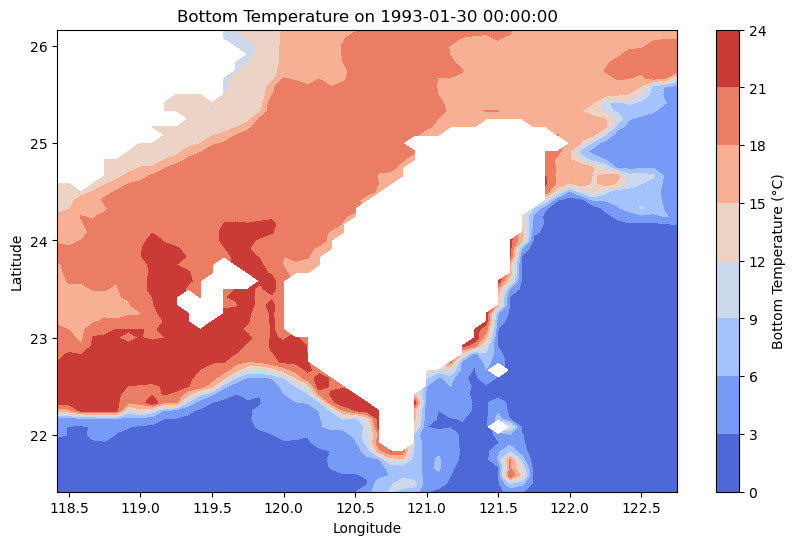

In [18]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
rootgrp = nc.Dataset("1993-2021ocentempt.nc")

# Extract variables
lat = rootgrp.variables['latitude'][:]
lon = rootgrp.variables['longitude'][:]
dep = rootgrp.variables['depth'][:]
bottomT = rootgrp.variables['bottomT'][:]
time = rootgrp.variables['time']

# Convert time values to datetime objects
time_values = time[:]
time_dates = nc.num2date(time_values, time.units)

# Close the file
rootgrp.close()

# Print the extracted data
print("Time dates:", time_dates)
print("Longitude:", lon)
print("Latitude:", lat)
print("Depth:", dep)

# Select a specific date for plotting
selected_date_index = 0  # Change this index to select a different date
selected_date = time_dates[selected_date_index]
selected_temperature = bottomT[selected_date_index, :, :]

# Plot the bottom temperature data for the selected date
plt.figure(figsize=(10, 6))
plt.contourf(lon, lat, selected_temperature, cmap='coolwarm')
plt.colorbar(label='Bottom Temperature (°C)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'Bottom Temperature on {selected_date}')
plt.show()


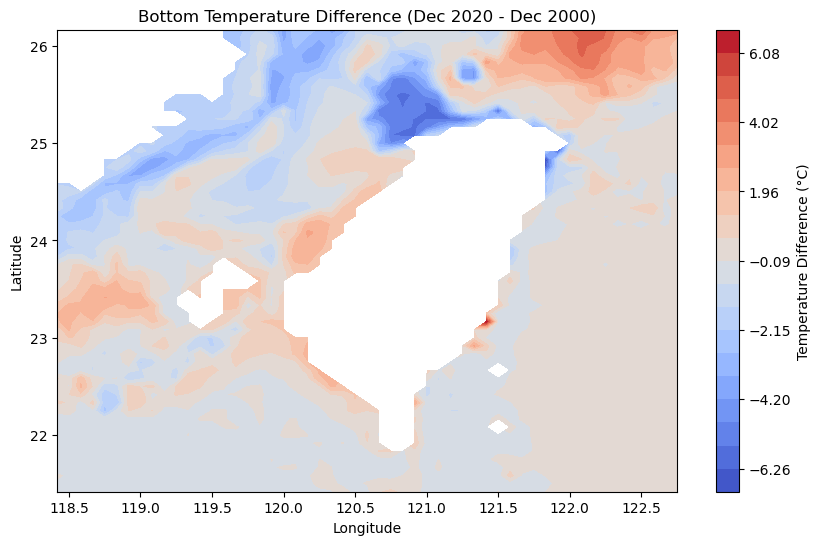

In [22]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
rootgrp = nc.Dataset("1993-2021ocentempt.nc")

# Extract variables
lat = rootgrp.variables['latitude'][:]
lon = rootgrp.variables['longitude'][:]
dep = rootgrp.variables['depth'][:]
bottomT = rootgrp.variables['bottomT'][:]
time = rootgrp.variables['time']

# Convert time values to datetime objects
time_values = time[:]
time_dates = nc.num2date(time_values, time.units)

# Find the indices for June 2000 and June 2020
Dec_2000_index = np.where((np.array([d.year for d in time_dates]) == 2000) & (np.array([d.month for d in time_dates]) == 12))[0][0]
Dec_2020_index = np.where((np.array([d.year for d in time_dates]) == 2020) & (np.array([d.month for d in time_dates]) == 12))[0][0]

# Get the bottom temperature data for June 2000 and June 2020
temp_12_2000 = bottomT[Dec_2000_index, :, :]
temp_12_2020 = bottomT[Dec_2020_index, :, :]

# Compute the difference
temp_diff = temp_12_2020 - temp_12_2000

# Close the file
rootgrp.close()

# Plot the temperature difference
plt.figure(figsize=(10, 6))
plt.contourf(lon, lat, temp_diff, cmap='coolwarm', levels=np.linspace(np.min(temp_diff), np.max(temp_diff), 21))
plt.colorbar(label='Temperature Difference (°C)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Bottom Temperature Difference (Dec 2020 - Dec 2000)')
plt.show()


In [8]:
# check the information about the variable tmp (temperature)
print(rootgrp.variables['bottomT'])

RuntimeError: NetCDF: Not a valid ID

In [ ]:
rootgrp = nc.Dataset("cmems_mod_glo_phy_my_0.083deg_P1D-m_1718194129396.nc") 

bottomT = rootgrp.variables['bottomT']

In [ ]:
import netCDF4
from datetime import datetime

nc = netCDF4.Dataset('cmems_mod_glo_phy_my_0.083deg_P1D-m_1718194129396.nc', 'r')
bottomT = nc.variables['bottomT']

start_date = datetime(1993, 1, 1)
end_date = datetime(2021, 6, 1)

time_var = nc.variables['time']
time_values = netCDF4.num2date(time_var[:], time_var.units)

start_index = next((i for i, x in enumerate(time_values) if x >= start_date), None)
end_index = next((i for i, x in enumerate(time_values) if x <= end_date), None)

bottomT_data = bottomT[start_index:end_index+1, :, :]

In [ ]:
# Assuming the data is in the format (time, latitude, longitude)
bottomT_data = bottomT_data.reshape(-1, bottomT_data.shape[1], bottomT_data.shape[2])

In [ ]:
import numpy as np
import pandas as pd

# Calculate monthly averages
monthly_averages = np.mean(bottomT_data, axis=0)

In [ ]:
# Convert to pandas DataFrame
monthly_averages_df = pd.DataFrame(monthly_averages.reshape(-1, 1), columns=['bottomT'])

In [ ]:
import matplotlib.pyplot as plt

# Plot the monthly averages
plt.figure(figsize=(10, 6))
plt.plot(monthly_averages_df.index, monthly_averages_df['bottomT'])
plt.xlabel('Month')
plt.ylabel('Monthly Average Bottom Temperature')
plt.title('Monthly Bottom Temperature (1993-2021)')
plt.show()

In [ ]:
###方法二

In [ ]:
import netCDF4 as nc
rootgrp = nc.Dataset("cmems_mod_glo_phy_my_0.083deg_P1D-m_1718194129396.nc")

In [ ]:
bottomT = rootgrp.variables['bottomT'][:]

In [ ]:
bottomT = bottomT.reshape((bottomT.shape[0], -1))

In [ ]:
import numpy as np
import datetime as dt

months = np.arange(1993, 2024, dtype=int)
monthly_bottomT = np.zeros((len(months), bottomT.shape[1]))
for i, month in enumerate(months):
    start_date = dt.datetime(month, 1, 1)
    end_date = dt.datetime(month + 1, 1, 1)
    start = np.where((rootgrp.variables['time'][:] >= start_date.timestamp()) & (rootgrp.variables['time'][:] <= end_date.timestamp()))[0]
    if len(start) == 0:
        continue
    start = start[0]
    end = np.where((rootgrp.variables['time'][:] >= start_date.timestamp()) & (rootgrp.variables['time'][:] <= end_date.timestamp()))[0][-1]
    monthly_bottomT[i] = np.mean(bottomT[start:end], axis=0)

In [ ]:
import numpy as np

# Assuming 'bottomT' is your array
bottomT = np.array(bottomT).flatten()

# Now, 'bottomT' is a 1-dimensional array

In [ ]:
import numpy as np

# Assuming 'time' is your 1-dimensional array of dates
# Assuming 'bottomT' is your 1-dimensional array of temperatures

# Flatten the 'time' array
time = np.array(time).flatten()

# Flatten the 'bottomT' array
bottomT = np.array(bottomT).flatten()

# Ensure both arrays are of the same length
if len(time) != len(bottomT):
    raise ValueError("Both arrays must be of the same length")

# Create a DataFrame with the date and temperature data
df = pd.DataFrame({'date': time, 'tempt': bottomT})

# Print the DataFrame
print(df)

In [ ]:

import pandas as pd
import cftime

# Assuming 'time' and 'bottomT' are the variables from the NetCDF dataset
# Flatten the 'bottomT' array to 1-dimensional
bottomT = bottomT.flatten()

# Convert the 'time' array to datetime objects
dates = [cftime.num2date(t, units='seconds since 1970-01-01 00:00:00') for t in time]

# Create a DataFrame with the date and temperature data
df = pd.DataFrame({'date': dates, 'tempt': bottomT})

# Print the DataFrame
print(df)

In [ ]:
import pandas as pd
import cftime

# Assuming 'time' and 'bottomT' are the variables from the NetCDF dataset
# Flatten the 'bottomT' array to 1-dimensional
bottomT = bottomT.flatten()

# Convert the 'time' array to datetime objects
dates = [cftime.num2date(t, units='seconds since 1970-01-01 00:00:00') for t in time]

# Ensure both arrays are of the same length
if len(dates) != len(bottomT):
    raise ValueError("Both arrays must be of the same length")

# Create a DataFrame with the date and temperature data
df = pd.DataFrame({'date': dates, 'tempt': bottomT})

# Print the DataFrame
print(df)

In [ ]:
import pandas as pd
import cftime

# Assuming 'time' and 'bottomT' are the variables from the NetCDF dataset
# Flatten the 'bottomT' array to 1-dimensional
bottomT = bottomT.flatten()

# Convert the 'time' array to datetime objects
dates = [cftime.num2date(t, units='seconds since 1970-01-01 00:00:00') for t in time]

# Ensure both arrays are of the same length
if len(dates) != len(bottomT):
    raise ValueError("Both arrays must be of the same length")

# Create a DataFrame with the date and temperature data
df = pd.DataFrame({'date': dates, 'tempt': bottomT})

# Print the DataFrame
print(df)


In [ ]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

# Open the .nc file
ds = xr.open_dataset('cmems_mod_glo_phy_my_0.083deg_P1D-m_1718194129396.nc')

# Identify the relevant variable for potential temperature at the sea surface
temp_var = ds['thetao']

# Extract the date and temperature data for the specified time range
start_date = '1993-01-01'
end_date = '2021-06-30'
temp_data = temp_var.sel(time=slice(start_date, end_date))

# Format the data into a table
temp_df = temp_data.to_dataframe().reset_index()
temp_df['date'] = temp_df['time'].dt.strftime('%Y/%m')
temp_df = temp_df[['date', 'thetao']]



In [ ]:
# Create a line chart
plt.figure(figsize=(50, 6))
plt.plot(temp_df['date'], temp_df['thetao'])
plt.xlabel('Date')
plt.ylabel('Potential Temperature (°C)')
plt.title('Historical Ocean Temperature Change (1993/01 - 2021/06)')
plt.xticks(rotation=45)
plt.show()

In [23]:
import numpy as np
from datetime import datetime

# 轉換 cftime.DatetimeGregorian 為 Python 的 datetime
python_dates = [datetime(date.year, date.month, date.day) for date in time_dates]

# 創建一個 mask 來選擇 2005 到 2020 年的資料
mask = [(date.year >= 2005 and date.year <= 2020) for date in python_dates]

# 應用 mask 到 bottomT 和 time_dates
bottomT_filtered = bottomT[mask]
dates_filtered = np.array(python_dates)[mask]

In [25]:
!pip install scipy

In [40]:
import numpy as np
from datetime import datetime

def find_20_degree_line(temp_field):
    lines = []
    for i in range(temp_field.shape[1]):  # 遍歷經度
        for j in range(temp_field.shape[0] - 1):  # 遍歷緯度
            if (temp_field[j, i] < 20 and temp_field[j+1, i] >= 20) or (temp_field[j, i] >= 20 and temp_field[j+1, i] < 20):
                y = lat[j] + (lat[j+1] - lat[j]) * (20 - temp_field[j, i]) / (temp_field[j+1, i] - temp_field[j, i])
                lines.append((lon[i], y))
    return lines

# 假設 time_dates 是一個包含所有日期的列表
# 首先，讓我們篩選出2005-2020年12月的數據
december_indices = []
for i, date in enumerate(time_dates):
    if 2005 <= date.year <= 2020 and date.month == 12:
        december_indices.append(i)

# 現在，我們只處理12月的數據
december_isotherms = {}
for index in december_indices:
    year = time_dates[index].year
    isotherm = find_20_degree_line(bottomT[index])
    if year not in december_isotherms:
        december_isotherms[year] = []
    december_isotherms[year].extend(isotherm)

# 計算每年12月的平均等溫線位置
yearly_avg_latitudes = {}
for year, isotherms in december_isotherms.items():
    if isotherms:
        avg_latitude = np.mean([pos[1] for pos in isotherms])
        yearly_avg_latitudes[year] = avg_latitude

# 輸出結果
for year, avg_latitude in yearly_avg_latitudes.items():
    print(f"{year}: 平均緯度 {avg_latitude:.4f}")

# 如果你想計算趨勢
years = list(yearly_avg_latitudes.keys())
latitudes = list(yearly_avg_latitudes.values())

from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(years, latitudes)

print(f"\n趨勢分析:")
print(f"斜率: {slope:.6f}")
print(f"截距: {intercept:.6f}")
print(f"R-值: {r_value:.6f}")
print(f"P-值: {p_value:.6f}")
print(f"標準誤差: {std_err:.6f}")


IndexError: invalid index to scalar variable.

In [30]:
# 計算等溫線的平均緯度位置
avg_positions = [np.mean([pos[1] for pos in positions]) if positions else np.nan for positions in isotherm_positions]

# 計算年度平均
yearly_avg = {}
for date, pos in zip(dates_filtered, avg_positions):
    if not np.isnan(pos):
        if date.year not in yearly_avg:
            yearly_avg[date.year] = []
        yearly_avg[date.year].append(pos)

for year in yearly_avg:
    yearly_avg[year] = np.mean(yearly_avg[year])

# 計算總體趨勢
from scipy import stats
years = list(yearly_avg.keys())
positions = list(yearly_avg.values())
slope, intercept, r_value, p_value, std_err = stats.linregress(years, positions)

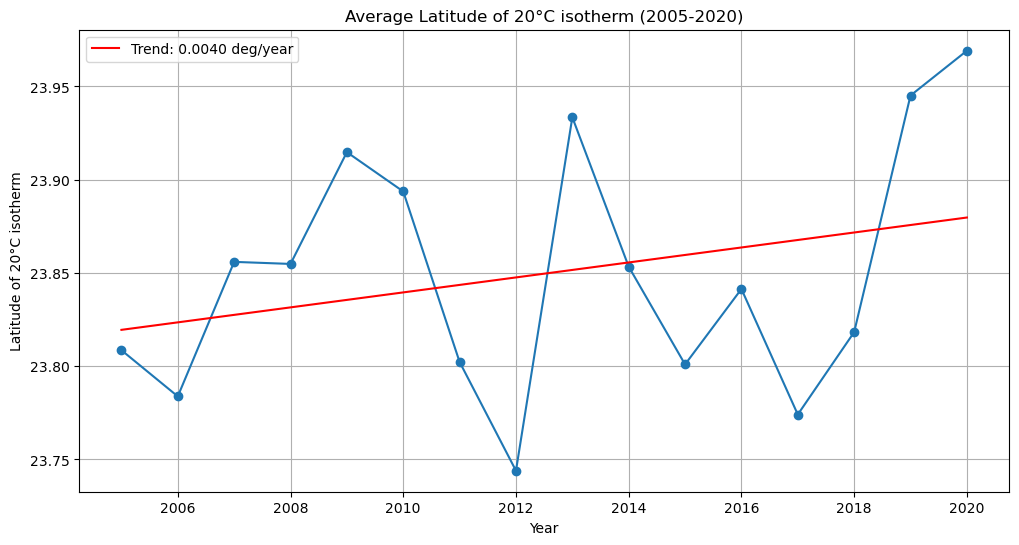

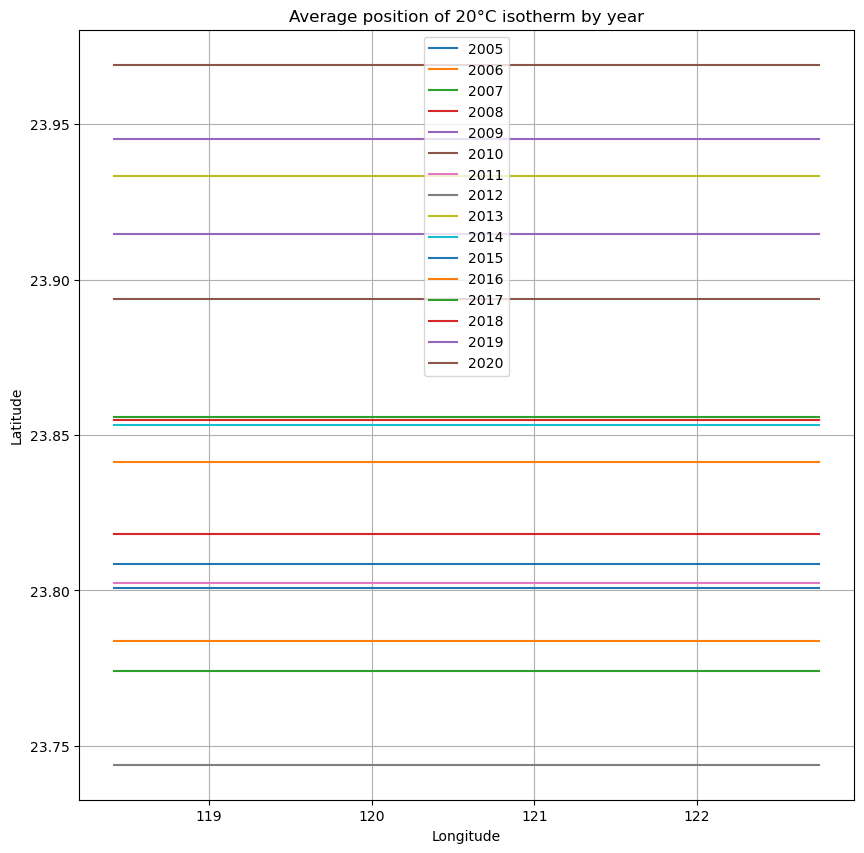

In [31]:
import matplotlib.pyplot as plt

# 繪製等溫線緯度位置的時間序列圖
plt.figure(figsize=(12, 6))
plt.plot(years, positions, 'o-')
plt.plot(years, intercept + slope * np.array(years), 'r', label=f'Trend: {slope:.4f} deg/year')
plt.xlabel('Year')
plt.ylabel('Latitude of 20°C isotherm')
plt.title('Average Latitude of 20°C isotherm (2005-2020)')
plt.legend()
plt.grid(True)
plt.show()

# 繪製等溫線在地圖上的位置變化
plt.figure(figsize=(10, 10))
for year, lat in yearly_avg.items():
    plt.plot([min(lon), max(lon)], [lat, lat], label=str(year))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Average position of 20°C isotherm by year')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 kB 871.9 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 17.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 33.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 38.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: /opt/homebrew/anaconda3/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [36]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from datetime import datetime

# 假設我們已經有了這些數據
# lat, lon, bottomT, time_dates 應該是從您的 netCDF 文件中讀取的

# 1. 篩選 2005 到 2020 年的資料
python_dates = [datetime(date.year, date.month, date.day) for date in time_dates]
mask = [(date.year >= 2005 and date.year <= 2020) for date in python_dates]
bottomT_filtered = bottomT[mask]
dates_filtered = np.array(python_dates)[mask]

# 2. 定義尋找 20 度等溫線的函數
def find_20_degree_line(temp_field):
    lines = []
    for i in range(temp_field.shape[1]):  # 遍歷經度
        for j in range(temp_field.shape[0] - 1):  # 遍歷緯度
            if (temp_field[j, i] < 20 and temp_field[j+1, i] >= 20) or (temp_field[j, i] >= 20 and temp_field[j+1, i] < 20):
                y = lat[j] + (lat[j+1] - lat[j]) * (20 - temp_field[j, i]) / (temp_field[j+1, i] - temp_field[j, i])
                lines.append((lon[i], y))
    return lines

# 3. 計算每一天的 20 度等溫線位置
daily_isotherms = [find_20_degree_line(bottomT_filtered[i]) for i in range(len(bottomT_filtered))]

# 4. 計算每年的平均等溫線位置
yearly_isotherms = {}
for date, isotherm in zip(dates_filtered, daily_isotherms):
    if date.year not in yearly_isotherms:
        yearly_isotherms[date.year] = []
    yearly_isotherms[date.year].extend(isotherm)

# 對每年的數據取平均
for year in yearly_isotherms:
    yearly_isotherms[year] = list(set(yearly_isotherms[year]))  # 移除重複點

# 5. 繪製地圖的函數
def plot_isotherm_map(year, isotherm_positions):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    
    # 設置地圖範圍
    ax.set_extent([110, 130, 15, 35], crs=ccrs.PlateCarree())
    
    # 添加陸地和海洋
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    
    # 添加海岸線
    ax.coastlines(resolution='10m')
    
    # 繪製網格線
    ax.gridlines(draw_labels=True)
    
    # 繪製20度等溫線
    lons, lats = zip(*isotherm_positions)
    ax.plot(lons, lats, color='red', linewidth=2, transform=ccrs.PlateCarree())
    
    # 設置標題
    plt.title(f'20°C Isotherm - {year}')
    
    plt.savefig(f'isotherm_map_{year}.png')
    plt.close()

# 6. 為每一年繪製等溫線圖
for year, isotherm_positions in yearly_isotherms.items():
    plot_isotherm_map(year, isotherm_positions)

print("所有年份的等溫線圖已生成完畢。")

IndexError: invalid index to scalar variable.

In [37]:
print("bottomT shape:", bottomT.shape)
print("lat shape:", lat.shape)
print("lon shape:", lon.shape)

bottomT shape: (10379, 58, 53)
lat shape: ()
lon shape: (53,)


In [38]:
lat = rootgrp.variables['latitude'][:]
print("lat shape after correction:", lat.shape)

RuntimeError: NetCDF: Not a valid ID

In [53]:
import netCDF4 as nc
import pandas as pd
import datetime

# 讀取 NetCDF 檔案
rootgrp = nc.Dataset("1993-2021ocentempt.nc")

# 提取所需變數
lat = rootgrp.variables['latitude'][:]
lon = rootgrp.variables['longitude'][:]
dep = rootgrp.variables['depth'][:]
bottomT = rootgrp.variables['bottomT'][:]
time = rootgrp.variables['time']
time_values = time[:]

# 將時間轉換成 datetime 物件
time_dates = nc.num2date(time_values, time.units)

# 關閉檔案
rootgrp.close()

# 建立 DataFrame
df = pd.DataFrame({
    'latitude': lat,
    'longitude': lon,
    'time': time_dates,
    'bottomT': bottomT.flatten()  # 將bottomT展平成一維
})

# 篩選出2005-2020年每年12月的數據
december_data = df[(df['time'].dt.year >= 2005) & (df['time'].dt.year <= 2020) & (df['time'].dt.month == 12)]

# 按年份分組並計算平均bottomT
december_avg = december_data.groupby([december_data['time'].dt.year, december_data['latitude'], december_data['longitude']]).mean().reset_index()

# 儲存處理後的數據
december_avg.to_csv('december_ocean_temperature_2005_2020.csv', index=False)


ValueError: All arrays must be of the same length

In [56]:
import netCDF4 as nc
import pandas as pd

# 讀取 NetCDF 檔案
rootgrp = nc.Dataset("1993-2021ocentempt.nc")

# 提取所需變數
lat = rootgrp.variables['latitude'][:]
lon = rootgrp.variables['longitude'][:]
time = rootgrp.variables['time'][:]
bottomT = rootgrp.variables['bottomT'][:]  # 這是 (time, latitude, longitude) 的多維數組

# 將時間轉換成 datetime 物件
time_units = rootgrp.variables['time'].units
time_dates = nc.num2date(time, units=time_units)

# 關閉檔案
rootgrp.close()

# 檢查變數的形狀
print("Latitude shape:", lat.shape)
print("Longitude shape:", lon.shape)
print("Time shape:", time_dates.shape)
print("Bottom Temperature shape:", bottomT.shape)

# 建立 DataFrame
data = {
    'time': [],
    'latitude': [],
    'longitude': [],
    'bottomT': []
}

# 填充 DataFrame
for t in range(bottomT.shape[0]):  # 遍歷每個時間點
    for i in range(lat.shape[0]):  # 遍歷每個緯度
        for j in range(lon.shape[0]):  # 遍歷每個經度
            data['time'].append(time_dates[t])  # 使用 cftime 日期
            data['latitude'].append(lat[i])
            data['longitude'].append(lon[j])
            data['bottomT'].append(bottomT[t, i, j])

# 將 cftime 日期轉換為字符串格式
data['time'] = [pd.to_datetime(dt) for dt in data['time']]

# 創建 DataFrame
df = pd.DataFrame(data)

# 篩選出2005-2020年每年12月的數據
december_data = df[(df['time'].dt.year >= 2005) & (df['time'].dt.year <= 2020) & (df['time'].dt.month == 12)]

# 按年份分組並計算平均 bottomT
december_avg = december_data.groupby([december_data['time'].dt.year, 'latitude', 'longitude']).mean().reset_index()

# 儲存處理後的數據
december_avg.to_csv('december_ocean_temperature_2005_2020.csv', index=False)


Latitude shape: (58,)
Longitude shape: (53,)
Time shape: (10379,)
Bottom Temperature shape: (10379, 58, 53)


TypeError: <class 'cftime._cftime.DatetimeGregorian'> is not convertible to datetime

In [4]:
import os
os.chdir('/Users/zhanbocun/TBIA_DataAnalysisContest')